<a href="https://colab.research.google.com/github/ShubhamPaliwal03/Botnet-Detection-Using-ML-XGBoost/blob/main/botnet_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from google.colab import files

# Load both files
attack = pd.read_csv("/content/CTU13_Attack_Traffic.csv")
normal = pd.read_csv("/content/CTU13_Normal_Traffic.csv")

# Add labels
attack['Label'] = 1  # Botnet
normal['Label'] = 0  # Normal

# Combine
df = pd.concat([attack, normal], ignore_index=True)

# Shuffle
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check
print(df.head())

# Save the combined dataset
df.to_csv('CTU13_Combined_Traffic.csv', index=False)

print("Combined Dataset Created!")

files.download('CTU13_Combined_Traffic.csv')

print("Combined Dataset Saved!")

   Unnamed: 0  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       31128          30670             0             2                0   
1       33686          25894             0             2                0   
2       49310          28525             0             2                0   
3       30424          29598             0             2                0   
4       28639          22644             0             2                0   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0              241                0                0               0.0   
1              176                0                0               0.0   
2              247                0                0               0.0   
3              114                0                0               0.0   
4              155                0                0               0.0   

   Fwd Pkt Len Std  ...  Fwd Act Data Pkts  Active Mean  Active Std  \
0              0.0  .

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Combined Dataset Saved!


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('Label', axis=1)  # Features
y = df['Label']              # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.998319145475248
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10719
           1       1.00      1.00      1.00      7724

    accuracy                           1.00     18443
   macro avg       1.00      1.00      1.00     18443
weighted avg       1.00      1.00      1.00     18443



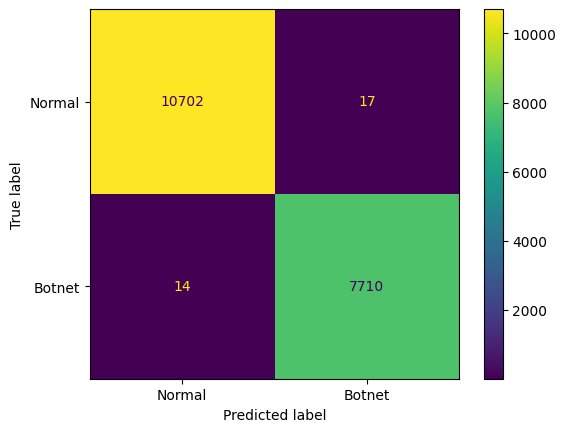

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Botnet'])
disp.plot()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import pandas as pd

# Load the combined dataset
full_dataset = pd.read_csv('/content/CTU13_Combined_Traffic.csv')

X = full_dataset.drop(columns=['Label'])
y = full_dataset['Label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Print table
result_table = pd.DataFrame(results)
print(result_table)


                 Model  Accuracy  Precision    Recall  F1-Score
0              XGBoost  0.998771   0.997927  0.999135  0.998531
1                  SVM  0.965768   0.967256  0.950277  0.958691
2  Logistic Regression  0.921523   0.918471  0.891387  0.904726
3                  KNN  0.994252   0.994022  0.992217  0.993119


In [14]:
# Train a model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
import joblib

In [15]:
# Load the combined dataset
data = pd.read_csv("/content/CTU13_Combined_Traffic.csv")

# Preview
print(data.head())

   Unnamed: 0  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       31128          30670             0             2                0   
1       33686          25894             0             2                0   
2       49310          28525             0             2                0   
3       30424          29598             0             2                0   
4       28639          22644             0             2                0   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0              241                0                0               0.0   
1              176                0                0               0.0   
2              247                0                0               0.0   
3              114                0                0               0.0   
4              155                0                0               0.0   

   Fwd Pkt Len Std  ...  Fwd Act Data Pkts  Active Mean  Active Std  \
0              0.0  .

In [16]:
# Features and Labels
X = data.drop('Label', axis=1)  # all columns except Label
y = data['Label']              # target column


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # ensures balanced split for both classes
)


In [18]:
# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    objective='binary:logistic',
    eval_metric='logloss',
)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Train
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [19]:
# Predict on test set
y_pred = xgb_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9983733371891267
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15994
           1       1.00      1.00      1.00     11670

    accuracy                           1.00     27664
   macro avg       1.00      1.00      1.00     27664
weighted avg       1.00      1.00      1.00     27664



In [20]:
joblib.dump(xgb_model, "botnet_detector_xgboost.model")
print("✅ Model saved successfully.")


✅ Model saved successfully.


✅ Accuracy: 0.9983733371891267
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15994
           1       1.00      1.00      1.00     11670

    accuracy                           1.00     27664
   macro avg       1.00      1.00      1.00     27664
weighted avg       1.00      1.00      1.00     27664

🧾 Confusion Matrix:
 [[15973    21]
 [   24 11646]]


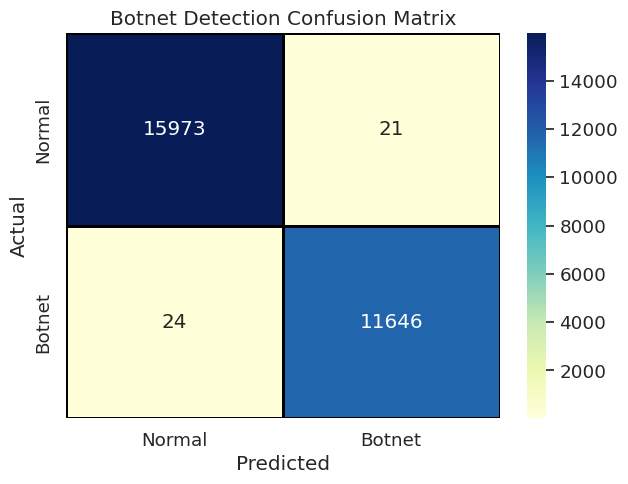

In [32]:
# Load the saved model
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your trained model
loaded_model = joblib.load("/content/botnet_detector_xgboost.model")

# Predict on test data
y_pred = loaded_model.predict(X_test)

# Accuracy & Classification Report
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("🧾 Confusion Matrix:\n", cm)

# Plot the Confusion Matrix
plt.figure(figsize=(7, 5))
sns.set(font_scale=1.2)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=1,
    linecolor='black',
    cbar=True,
    xticklabels=['Normal', 'Botnet'],
    yticklabels=['Normal', 'Botnet']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Botnet Detection Confusion Matrix')
plt.show()


In [22]:
# Testing on a single sample

# Example: testing a single network flow (replace with real feature values)
sample_data = [X_test.iloc[0]]  # first sample from test set

# Predict
prediction = loaded_model.predict(sample_data)

if prediction[0] == 1:
    print("⚠️ Detected: Botnet Traffic!")
else:
    print("✅ Detected: Normal Traffic.")


⚠️ Detected: Botnet Traffic!


In [23]:
# Example: testing a single network flow (replace with real feature values)
sample_data = [X_test.iloc[1]]  # second sample from test set

# Predict
prediction = loaded_model.predict(sample_data)

if prediction[0] == 1:
    print("⚠️ Detected: Botnet Traffic!")
else:
    print("✅ Detected: Normal Traffic.")


⚠️ Detected: Botnet Traffic!


In [24]:
# Example: testing a single network flow with random values
sample_data = [[150.5, 500, 80, 1500, 800, 20, 1, 15, 8, 3, 12, 25, 0.12, 2.3, 0.04, 0.05, 10, 0.1, 0.05, 0.15, 1, 2, 10, 8, 50, 100, 200, 300, 1, 0, 0, 0, 1, 0.5, 20, 0.1, 1, 2, 10, 0.9, 1000, 50, 1, 0.03, 0.02, 0.4, 50, 8, 10, 15, 20, 0.1, 0.2, 50, 12, 0.15, 0.05, 0.25]]  # Example feature vector

# Prediction
prediction = loaded_model.predict(sample_data)

if prediction[0] == 1:
    print("⚠️ Alert! Botnet traffic detected!")
else:
    print("✅ Normal traffic.")


⚠️ Alert! Botnet traffic detected!


In [33]:
import pandas as pd
import joblib

# Load trained model
model = joblib.load('/content/botnet_detector_xgboost.model')

# Load your flow features CSV
csv_file = '/content/Normal_Network_Flow.csv'
df = pd.read_csv(csv_file)

# Make sure your dataframe has only the expected model features
EXPECTED_FEATURES = [
    'Unnamed: 0', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
    'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
    'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
    'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
    'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
    'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
    'Bwd PSH Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
    'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
    'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'ACK Flag Cnt', 'Down/Up Ratio',
    'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Init Bwd Win Byts',
    'Fwd Act Data Pkts', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

df['Unnamed: 0'] = df.index

# Keep only those columns
df = df[EXPECTED_FEATURES]

# Replace Inf / NaN
df = df.replace([float('inf'), -float('inf')], 0).fillna(0)

# Predict
predictions = model.predict(df)

# Print Results
for idx, pred in enumerate(predictions):
    if pred == 1:
        print(f"Flow {idx}: ⚠️ Botnet Traffic Detected!")
    else:
        print(f"Flow {idx}: ✅ Normal Traffic.")


Flow 0: ✅ Normal Traffic.
Flow 1: ✅ Normal Traffic.
Flow 2: ✅ Normal Traffic.
Flow 3: ✅ Normal Traffic.
Flow 4: ✅ Normal Traffic.
Flow 5: ✅ Normal Traffic.
Flow 6: ⚠️ Botnet Traffic Detected!
Flow 7: ✅ Normal Traffic.
Flow 8: ✅ Normal Traffic.
Flow 9: ✅ Normal Traffic.
Flow 10: ✅ Normal Traffic.


In [35]:
import pandas as pd
import joblib

# Load trained model
model = joblib.load('/content/botnet_detector_xgboost.model')

# Load your flow features CSV
csv_file = '/content/Idle_Network_Flow.csv'
df = pd.read_csv(csv_file)

# Make sure your dataframe has only the expected model features
EXPECTED_FEATURES = [
    'Unnamed: 0', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
    'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
    'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
    'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
    'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
    'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
    'Bwd PSH Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
    'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
    'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'ACK Flag Cnt', 'Down/Up Ratio',
    'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Init Bwd Win Byts',
    'Fwd Act Data Pkts', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

df['Unnamed: 0'] = df.index

# Keep only those columns
df = df[EXPECTED_FEATURES]

# Replace Inf / NaN
df = df.replace([float('inf'), -float('inf')], 0).fillna(0)

# Predict
predictions = model.predict(df)

# Print Results
for idx, pred in enumerate(predictions):
    if pred == 1:
        print(f"Flow {idx}: ⚠️ Botnet Traffic Detected!")
    else:
        print(f"Flow {idx}: ✅ Normal Traffic.")


Flow 0: ✅ Normal Traffic.
Flow 1: ⚠️ Botnet Traffic Detected!
Flow 2: ⚠️ Botnet Traffic Detected!
Flow 3: ✅ Normal Traffic.
Flow 4: ✅ Normal Traffic.
Flow 5: ⚠️ Botnet Traffic Detected!
Flow 6: ✅ Normal Traffic.
Flow 7: ✅ Normal Traffic.
Flow 8: ✅ Normal Traffic.
